In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dc_capital_bike = pd.read_csv('dc_bikes_sample_3000.csv', sep=',')

In [289]:
dc_capital_bike.shape

(108000, 30)

In [290]:
dc_capital_bike

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Date_dow_name,Date_month_name,Date_month_no,day,dow,weekend,ride_count,hour,Minute,time
0,3363.0,classic_bike,2021-01-02 13:56:30,2021-01-02 14:02:06,15th & P St NW,31201.0,20th & O St NW / Dupont South,31234.0,38.909868,-77.034421,...,Saturday,January,1,2,5,1,7690469,13,56,13:56:30
1,97357.0,docked_bike,2021-01-30 15:34:48,2021-01-30 17:05:41,Lincoln Memorial,31258.0,4th & M St SE,31652.0,38.888255,-77.049437,...,Saturday,January,1,30,5,1,534336,15,34,15:34:48
2,46177.0,classic_bike,2021-01-15 07:11:24,2021-01-15 07:13:20,11th & M St NW,31266.0,Convention Center / 7th & M St NW,31223.0,38.905578,-77.027313,...,Friday,January,1,15,4,0,7690469,7,11,07:11:24
3,95158.0,classic_bike,2021-01-30 06:49:29,2021-01-30 06:54:30,12th & L St NW,31251.0,7th & F St NW / National Portrait Gallery,31232.0,38.903819,-77.028400,...,Saturday,January,1,30,5,1,7690469,6,49,06:49:29
4,41194.0,classic_bike,2021-01-13 17:42:09,2021-01-13 17:46:28,King St Metro North / Cameron St,31098.0,King St & Patrick St,31044.0,38.807040,-77.059817,...,Wednesday,January,1,13,2,0,7690469,17,42,17:42:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,NaN,classic_bike,2023-12-17 13:55:51,2023-12-17 14:01:24,24th & N St NW,31255.0,22nd & H St NW,31127.0,38.906600,-77.051520,...,Sunday,December,12,17,6,1,7690469,13,55,13:55:51
107996,NaN,classic_bike,2023-12-09 09:44:07,2023-12-09 09:55:03,15th & P St NW,31201.0,18th St & Pennsylvania Ave NW,31242.0,38.909801,-77.034427,...,Saturday,December,12,9,5,1,7690469,9,44,09:44:07
107997,NaN,electric_bike,2023-12-04 23:03:13,2023-12-04 23:21:05,Long Bridge Park / Long Bridge Dr & 6th St S,31090.0,Wisconsin Ave & O St NW,31312.0,38.865514,-77.049985,...,Monday,December,12,4,0,0,1347887,23,3,23:03:13
107998,NaN,classic_bike,2023-12-11 09:23:48,2023-12-11 09:27:21,Half & Water St SW,31664.0,1st & Q St SW,31676.0,38.866277,-77.010551,...,Monday,December,12,11,0,0,7690469,9,23,09:23:48


In [291]:
#find missing null values
dc_capital_bike.isnull().sum()

#drop missing values
dc_capital_bike = dc_capital_bike.dropna()

# FOCUSING ON BIKES 

In [292]:
dc_capital_bike[['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id','start_lat']].nunique()

start_station_name      803
end_station_name        805
start_station_id        737
end_station_id          737
start_lat             12535
dtype: int64

In [293]:
top_stations = (
    dc_capital_bike
    .groupby('start_station_name',observed=False)
    .agg(trip_count=('ride_id', 'count'))
    .nlargest(10, 'trip_count')
    .reset_index()
)

top_stations

,start_station_name,trip_count
0,New Hampshire Ave & T St NW,1103
1,Lincoln Memorial,1050
2,15th & P St NW,1008
3,Columbus Circle / Union Station,1007
4,4th St & Madison Dr NW,908
5,Jefferson Dr & 14th St SW,881
6,1st & M St NE,854
7,14th & V St NW,795
8,Smithsonian-National Mall / Jefferson Dr & 12t...,791
9,5th & K St NW,779


In [294]:
end_stations = (
    dc_capital_bike
    .groupby('end_station_name',observed=False)
    .agg(trip_count=('ride_id', 'count'))
    .nlargest(10, 'trip_count')
    .reset_index()
)

end_stations

,end_station_name,trip_count
0,New Hampshire Ave & T St NW,1079
1,Columbus Circle / Union Station,1063
2,15th & P St NW,1053
3,Lincoln Memorial,982
4,Jefferson Dr & 14th St SW,947
5,1st & M St NE,920
6,4th St & Madison Dr NW,899
7,Massachusetts Ave & Dupont Circle NW,863
8,Henry Bacon Dr & Lincoln Memorial Circle NW,796
9,Smithsonian-National Mall / Jefferson Dr & 12t...,786


In [295]:
popular_stations = pd.concat([top_stations, end_stations], axis=1)
popular_stations

,start_station_name,trip_count,end_station_name,trip_count
0,New Hampshire Ave & T St NW,1103,New Hampshire Ave & T St NW,1079
1,Lincoln Memorial,1050,Columbus Circle / Union Station,1063
2,15th & P St NW,1008,15th & P St NW,1053
3,Columbus Circle / Union Station,1007,Lincoln Memorial,982
4,4th St & Madison Dr NW,908,Jefferson Dr & 14th St SW,947
5,Jefferson Dr & 14th St SW,881,1st & M St NE,920
6,1st & M St NE,854,4th St & Madison Dr NW,899
7,14th & V St NW,795,Massachusetts Ave & Dupont Circle NW,863
8,Smithsonian-National Mall / Jefferson Dr & 12t...,791,Henry Bacon Dr & Lincoln Memorial Circle NW,796
9,5th & K St NW,779,Smithsonian-National Mall / Jefferson Dr & 12t...,786


In [296]:
#calculating the num  of trips by member type
trip_counts = dc_capital_bike['member_casual'].value_counts()

#calculating the percentage of trips by member type
trip_percent = (trip_counts / trip_counts.sum()) * 100

trip_percent

member_casual
member    61.310389
casual    38.689611
Name: count, dtype: float64

In [297]:
# Group by rideable_type and member_casual, then count rides
ride_counts = dc_capital_bike.groupby(['rideable_type', 'member_casual'])['ride_id'].count().reset_index()

# Rename the count column for clarity
ride_counts.rename(columns={'ride_id': 'total_rides'}, inplace=True)
print(ride_counts)

   rideable_type member_casual  total_rides
0   classic_bike        casual        27408
1   classic_bike        member        53561
2    docked_bike        casual         6082
3  electric_bike        casual         4822
4  electric_bike        member         7151


In [298]:
# Group by season and rideable_type, and count rides
season_bike_usage = dc_capital_bike.groupby(['Season', 'rideable_type'])['ride_id'].count().reset_index()

# Rename columns for clarity
season_bike_usage.rename(columns={'ride_id': 'total_rides'}, inplace=True)
print(season_bike_usage)


  Season  rideable_type  total_rides
0   Fall   classic_bike        80969
1   Fall    docked_bike         6082
2   Fall  electric_bike        11973


In [299]:
# Calculate average speed for each rideable type
average_speed = dc_capital_bike.groupby('rideable_type')['speed_kmh'].mean().reset_index()

# Rename columns for clarity
average_speed.rename(columns={'speed_kmh': 'average_speed_kmh'}, inplace=True)

# Sort by average speed to find the fastest bike
fastest_bike = average_speed.sort_values(by='average_speed_kmh', ascending=False).iloc[0]
print(fastest_bike)


rideable_type        electric_bike
average_speed_kmh              inf
Name: 2, dtype: object


In [300]:
# Add a ride count column (group by 'rideable_type' or 'start_station_name')
dc_capital_bike['ride_count'] = dc_capital_bike.groupby('rideable_type')['rideable_type'].transform('count')

# Display the updated dataframe
print(dc_capital_bike)

          ride_id rideable_type           started_at             ended_at  \
0          3363.0  classic_bike  2021-01-02 13:56:30  2021-01-02 14:02:06   
1         97357.0   docked_bike  2021-01-30 15:34:48  2021-01-30 17:05:41   
2         46177.0  classic_bike  2021-01-15 07:11:24  2021-01-15 07:13:20   
3         95158.0  classic_bike  2021-01-30 06:49:29  2021-01-30 06:54:30   
4         41194.0  classic_bike  2021-01-13 17:42:09  2021-01-13 17:46:28   
...           ...           ...                  ...                  ...   
101627  9569268.0  classic_bike  2023-10-01 09:08:31  2023-10-01 09:15:27   
101851  9569701.0  classic_bike  2023-10-01 09:40:34  2023-10-01 09:48:47   
101869  9569335.0  classic_bike  2023-10-01 09:15:59  2023-10-01 09:33:09   
101919  9570993.0  classic_bike  2023-10-01 10:52:13  2023-10-01 12:00:27   
101930  9570637.0  classic_bike  2023-10-01 10:36:06  2023-10-01 11:22:49   

                      start_station_name  start_station_id  \
0            

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2348520884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_capital_bike['ride_count'] = dc_capital_bike.groupby('rideable_type')['rideable_type'].transform('count')


In [301]:

# Define a threshold for long trips (e.g., distance > 10 km or duration > 60 minutes)
distance_threshold = 10  # km
duration_threshold = 60  # minutes

# Filter long trips based on the threshold
long_trips = dc_capital_bike[(dc_capital_bike['distance_km'] > distance_threshold) | (dc_capital_bike['hour'] > duration_threshold)]

# Count the occurrences of each rideable type for long trips
long_trip_counts = long_trips['rideable_type'].value_counts()

# Find the most used rideable bike
most_used_bike = long_trip_counts.idxmax()
most_used_count = long_trip_counts.max()

# Display the results
print("Most Used Rideable Bike for Long Trips:")
print(f"Bike Type: {most_used_bike}, Count: {most_used_count}")


Most Used Rideable Bike for Long Trips:
Bike Type: classic_bike, Count: 111


In [302]:
# Combine start and end locations into a single column
dc_capital_bike['start_station_name'] = dc_capital_bike[['start_lat', 'start_lng']].apply(tuple, axis=1)

# Count rides for combined locations
location_counts = dc_capital_bike['start_station_name'].value_counts().reset_index(name='ride_count')
location_counts.columns = ['start_station_name', 'ride_count']

print("\nMost Frequently Used Locations (Start + End):")
print(location_counts)


Most Frequently Used Locations (Start + End):
                             start_station_name  ride_count
0                       (38.915544, -77.038252)         989
1                         (38.89696, -77.00493)         911
2       (38.90980062655191, -77.03442692756653)         796
3                       (38.888774, -77.028694)         765
4                       (38.905697, -77.005483)         747
...                                         ...         ...
12899           (38.90182033333333, -77.051107)           1
12900           (38.86850916666667, -77.225215)           1
12901           (38.904804, -77.04158566666666)           1
12902         (38.918094833333335, -77.0452955)           1
12903  (38.965743333333336, -76.95480783333333)           1

[12904 rows x 2 columns]


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/1181690649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_capital_bike['start_station_name'] = dc_capital_bike[['start_lat', 'start_lng']].apply(tuple, axis=1)


In [303]:
# Filter for summer rides
summer_rides = dc_capital_bike[dc_capital_bike['Season'] == 'summer']

# Count the occurrences of each rideable bike type
#bike_counts = summer_rides['rideable_type'].value_counts()

# Find the most used rideable bike
#most_used_bike = bike_counts.idxmax()
#most_used_count = bike_counts.max()

# Display the results
#print(f"Most Used Rideable Bike in Summer: {most_used_bike}, Count: {most_used_count}")

# Convert 'started_at' to datetime
dc_capital_bike['started_at'] = pd.to_datetime(dc_capital_bike['started_at'])

# Filter for summer months (June, July, August)
summer_data = dc_capital_bike[dc_capital_bike['started_at'].dt.month.isin([6, 7, 8])]

# Check if the filtered data is empty
if summer_data.empty:
    print("No data available for summer.")
else:
    # Find the most used bike type
    bike_counts = summer_data['rideable_type'].value_counts()
    if not bike_counts.empty:
        most_used_bike = bike_counts.idxmax()
        print(f"The most used bike in summer is: {most_used_bike}")
    else:
        print("No bike usage data available for summer.")

The most used bike in summer is: classic_bike


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/3960448703.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_capital_bike['started_at'] = pd.to_datetime(dc_capital_bike['started_at'])


In [304]:


# Convert 'started_at' to datetime
dc_capital_bike['started_at'] = pd.to_datetime(dc_capital_bike['started_at'])

# Extract the day of the week (0=Monday, 6=Sunday)
dc_capital_bike['weekend'] = dc_capital_bike['started_at'].dt.weekday

# Filter for weekend rides (Saturday=5, Sunday=6)
weekend_rides = dc_capital_bike[dc_capital_bike['weekend'].isin([5, 6])]

# Count the occurrences of each rideable bike type
bike_counts = weekend_rides['rideable_type'].value_counts()

# Find the most used rideable bike
most_used_bike = bike_counts.idxmax()
most_used_count = bike_counts.max()

# Display the results
print(f"Most Used Rideable Bike on Weekends: {most_used_bike}, Count: {most_used_count}")


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2565134379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_capital_bike['started_at'] = pd.to_datetime(dc_capital_bike['started_at'])
/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2565134379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_capital_bike['weekend'] = dc_capital_bike['started_at'].dt.weekday


Most Used Rideable Bike on Weekends: classic_bike, Count: 24255


In [305]:


# Filter for electric bikes
electric_bike_data = dc_capital_bike[dc_capital_bike['rideable_type'] == 'electric_bike']

# Group by start station name and count rides
station_counts = electric_bike_data.groupby('start_station_name').size()

# Find the start station with the most electric bike rides
most_used_station = station_counts.idxmax()
most_used_count = station_counts.max()

# Display the results
print(f"Start Station with Most Electric Bike Rides: {most_used_station}, Count: {most_used_count}")


Start Station with Most Electric Bike Rides: (38.785862207, -77.016768932), Count: 1


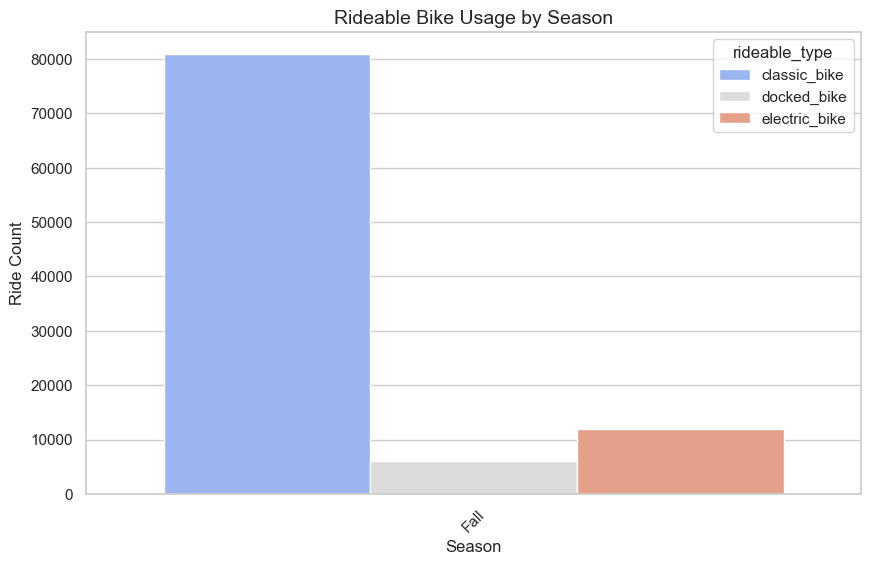

In [306]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=dc_capital_bike, x='Season', hue='rideable_type', palette='coolwarm', dodge=True)

# Add labels and title
plt.xlabel("Season", fontsize=12)
plt.ylabel("Ride Count", fontsize=12)
plt.title("Rideable Bike Usage by Season", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/954905724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dc_capital_bike, x='member_casual', palette='coolwarm')


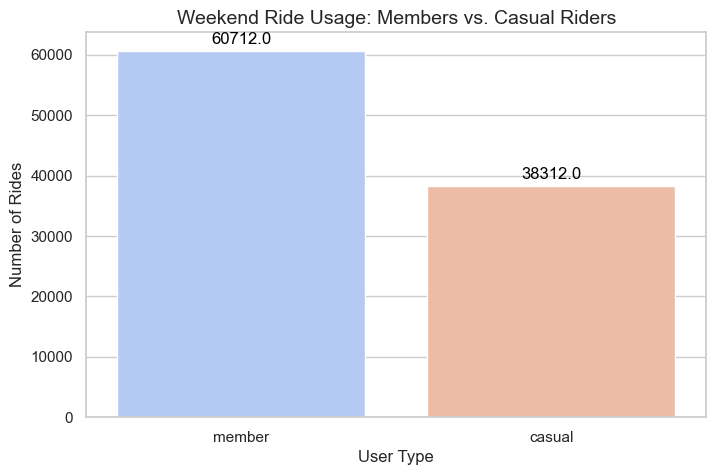

In [307]:
# Filter for weekend rides (Saturday=5, Sunday=6)
#weekend_rides = df[df['day_of_week'].isin([5, 6])]

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=dc_capital_bike, x='member_casual', palette='coolwarm')

# Add labels and title
plt.xlabel("User Type", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Weekend Ride Usage: Members vs. Casual Riders", fontsize=14)

# Show the count on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2152846470.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_counts = filtered_dc.groupby(['time_of_day', 'member_casual']).size().reset_index(name='count')


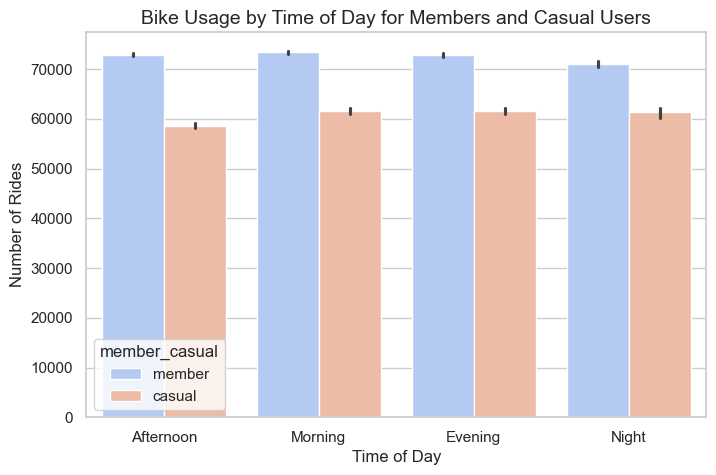

In [308]:
# Count rides by time of day and member type
time_counts = filtered_dc.groupby(['time_of_day', 'member_casual']).size().reset_index(name='count')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=dc_capital_bike, x='time_of_day', y='ride_count', hue='member_casual', palette='coolwarm')

# Add labels and title
plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Number of Rides", fontsize=12)
plt.title("Bike Usage by Time of Day for Members and Casual Users", fontsize=14)

# Show the plot
plt.show()

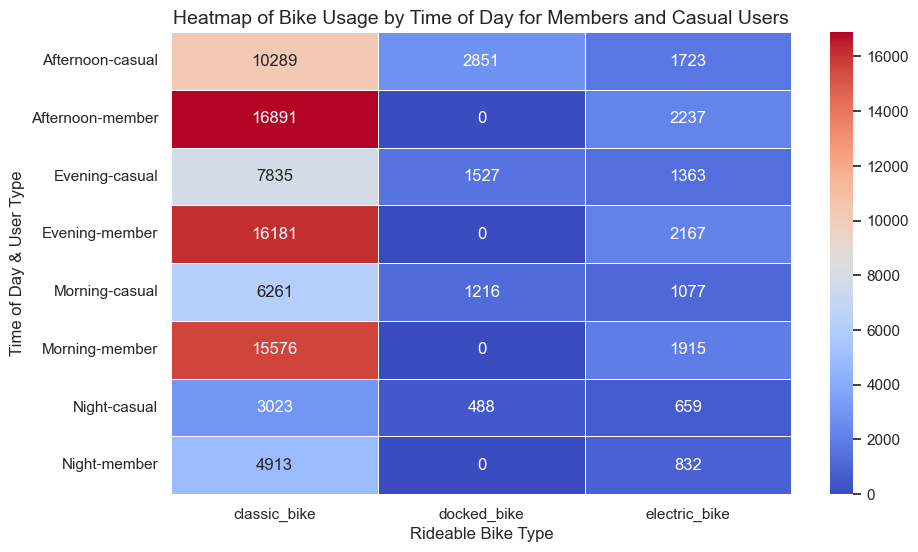

In [309]:
# Count rides by time of day, member type, and rideable bike type
time_counts = dc_capital_bike.groupby(['time_of_day', 'member_casual', 'rideable_type']).size().reset_index(name='count')

# Create a pivot table for heatmap
pivot_table = time_counts.pivot_table(index=['time_of_day', 'member_casual'], columns='rideable_type', values='count', fill_value=0)

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5, fmt="g")

# Add labels and title
plt.xlabel("Rideable Bike Type", fontsize=12)
plt.ylabel("Time of Day & User Type", fontsize=12)
plt.title("Heatmap of Bike Usage by Time of Day for Members and Casual Users", fontsize=14)

# Show the plot
plt.show()


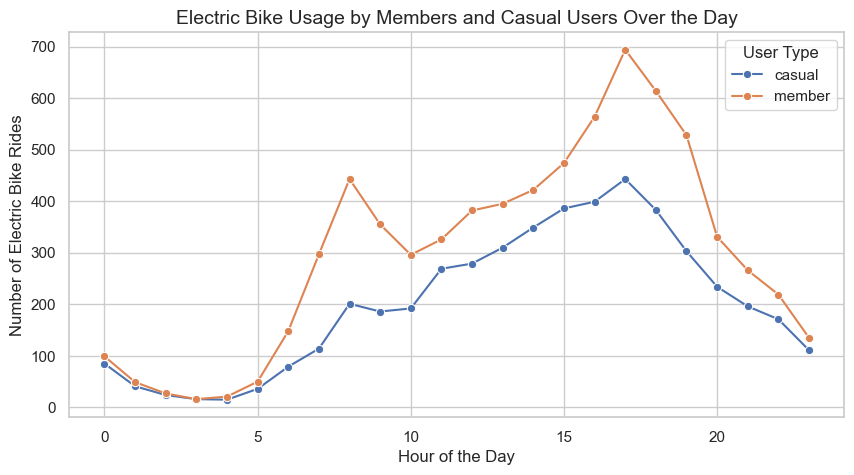

In [310]:
# Extract the date or hour for time-based analysis
#filtered_dc['hour'] = filtered_dc['started_at'].dt.hour  # Extracting hours

# Filter for electric bikes only
filtered_dc_electric = dc_capital_bike[dc_capital_bike['rideable_type'] == 'electric_bike']

# Count the number of electric bike rides by hour and user type
electric_counts = filtered_dc_electric.groupby(['hour', 'member_casual']).size().reset_index(name='count')

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=electric_counts, x='hour', y='count', hue='member_casual', marker='o')

# Add labels and title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Electric Bike Rides", fontsize=12)
plt.title("Electric Bike Usage by Members and Casual Users Over the Day", fontsize=14)
plt.legend(title="User Type")

# Show the plot
plt.show()


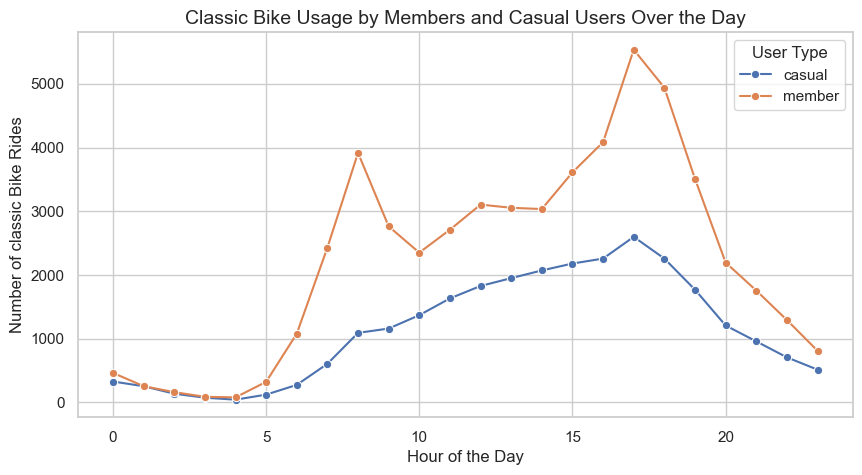

In [311]:
# Filter for electric bikes only
filtered_dc_electric = dc_capital_bike[dc_capital_bike['rideable_type'] == 'classic_bike']

# Count the number of electric bike rides by hour and user type
electric_counts = filtered_dc_electric.groupby(['hour', 'member_casual']).size().reset_index(name='count')

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=electric_counts, x='hour', y='count', hue='member_casual', marker='o')

# Add labels and title
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of classic Bike Rides", fontsize=12)
plt.title("Classic Bike Usage by Members and Casual Users Over the Day", fontsize=14)
plt.legend(title="User Type")

# Show the plot
plt.show()

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2361656581.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_station_counts, x='start_station_name', y='count', palette="coolwarm")


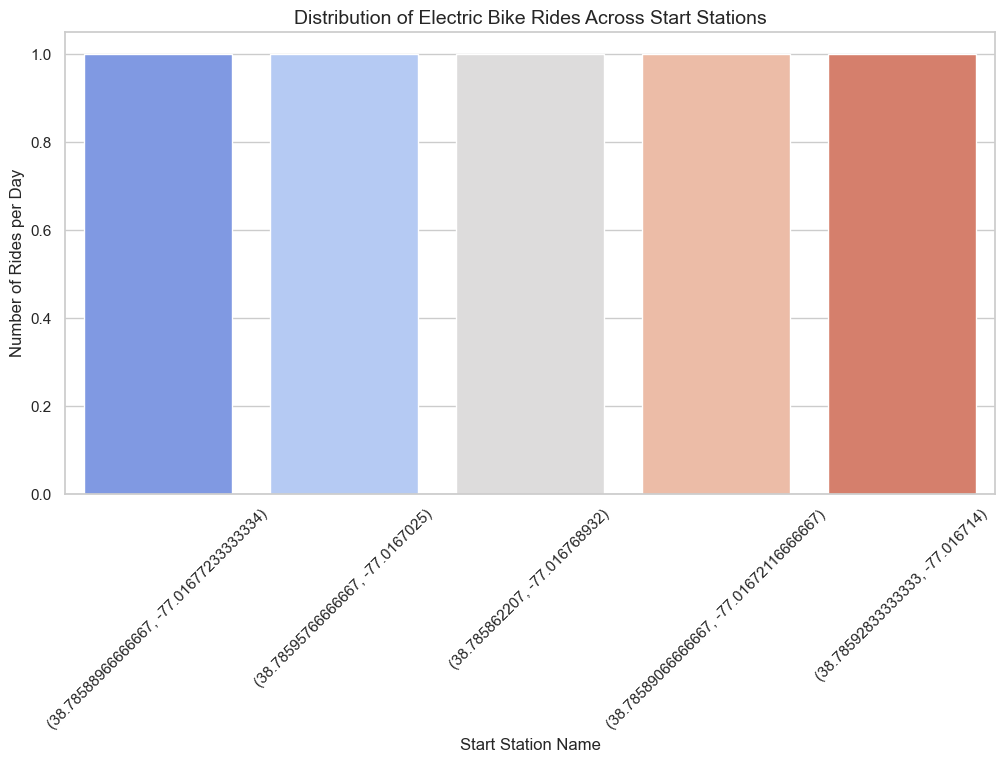

In [312]:
# Filter for electric bikes only
df_electric = dc_capital_bike[dc_capital_bike['rideable_type'] == 'electric_bike']

# Count rides per start station per day
station_counts = df_electric.groupby(['Date_year', 'start_station_name']).size().reset_index(name='count')

# Ensure there are no MultiIndex issues
station_counts = station_counts.reset_index(drop=True)

# Handle missing values
station_counts = station_counts.dropna(subset=['start_station_name'])

# Ensure correct data types
station_counts['start_station_name'] = station_counts['start_station_name'].astype(str)
station_counts['count'] = pd.to_numeric(station_counts['count'], errors='coerce')

# Optional: Filter to top 10 stations for clarity
top_stations = station_counts.groupby('start_station_name')['count'].sum().nlargest(5).index
filtered_station_counts = station_counts[station_counts['start_station_name'].isin(top_stations)]

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Create box plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_station_counts, x='start_station_name', y='count', palette="coolwarm")

# Add labels and title
plt.xlabel("Start Station Name", fontsize=12)
plt.ylabel("Number of Rides per Day", fontsize=12)
plt.title("Distribution of Electric Bike Rides Across Start Stations", fontsize=14)

# Rotate x-axis labels if overlapping
plt.xticks(rotation=45)

# Show the plot
plt.show()


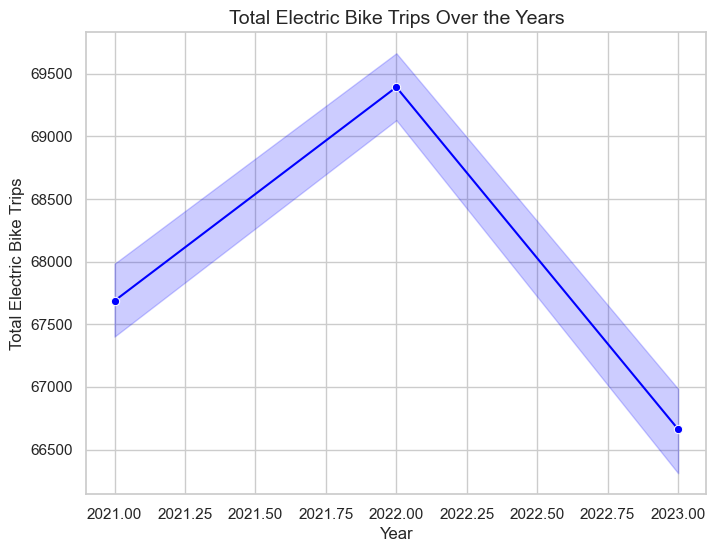

In [314]:
# 2️⃣ Filter for electric bikes only
df_electric = dc_capital_bike[dc_capital_bike['rideable_type'] == 'electric_bike']

# 3️⃣ Group by year and count the total trips
electric_bike_trips_per_year = df_electric.groupby('Date_year').size().reset_index(name='total_trips')

# 4️⃣ Plot using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=dc_capital_bike, x='Date_year', y='ride_count', marker='o', color='blue')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Electric Bike Trips', fontsize=12)
plt.title('Total Electric Bike Trips Over the Years', fontsize=14)

# Show the plot
plt.show()


In [ ]:
dc_capital_bike


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Date_dow_name,Date_month_name,Date_month_no,day,dow,weekend,ride_count,hour,Minute,time
0,3363.0,classic_bike,2021-01-02 13:56:30,2021-01-02 14:02:06,"(38.909868, -77.034421)",31201.0,20th & O St NW / Dupont South,31234.0,38.909868,-77.034421,...,Saturday,January,1,2,5,5,80969,13,56,13:56:30
1,97357.0,docked_bike,2021-01-30 15:34:48,2021-01-30 17:05:41,"(38.888255, -77.049437)",31258.0,4th & M St SE,31652.0,38.888255,-77.049437,...,Saturday,January,1,30,5,5,6082,15,34,15:34:48
2,46177.0,classic_bike,2021-01-15 07:11:24,2021-01-15 07:13:20,"(38.9055785, -77.027313)",31266.0,Convention Center / 7th & M St NW,31223.0,38.905578,-77.027313,...,Friday,January,1,15,4,4,80969,7,11,07:11:24
3,95158.0,classic_bike,2021-01-30 06:49:29,2021-01-30 06:54:30,"(38.903819, -77.0284)",31251.0,7th & F St NW / National Portrait Gallery,31232.0,38.903819,-77.028400,...,Saturday,January,1,30,5,5,80969,6,49,06:49:29
4,41194.0,classic_bike,2021-01-13 17:42:09,2021-01-13 17:46:28,"(38.80704, -77.059817)",31098.0,King St & Patrick St,31044.0,38.807040,-77.059817,...,Wednesday,January,1,13,2,2,80969,17,42,17:42:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101627,9569268.0,classic_bike,2023-10-01 09:08:31,2023-10-01 09:15:27,"(38.900358, -77.012108)",31638.0,3rd & H St NE,31616.0,38.900358,-77.012108,...,Sunday,October,10,1,6,6,80969,9,8,09:08:31
101851,9569701.0,classic_bike,2023-10-01 09:40:34,2023-10-01 09:48:47,"(38.905303, -77.050264)",31128.0,15th & M St NW,31298.0,38.905303,-77.050264,...,Sunday,October,10,1,6,6,80969,9,40,09:40:34
101869,9569335.0,classic_bike,2023-10-01 09:15:59,2023-10-01 09:33:09,"(38.898301, -77.118009)",31900.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.898301,-77.118009,...,Sunday,October,10,1,6,6,80969,9,15,09:15:59
101919,9570993.0,classic_bike,2023-10-01 10:52:13,2023-10-01 12:00:27,"(38.897274, -76.994749)",31631.0,M St & Pennsylvania Ave NW,31246.0,38.897274,-76.994749,...,Sunday,October,10,1,6,6,80969,10,52,10:52:13


In [315]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=dc_capital_bike['started_at'].min(), end=dc_capital_bike['started_at'].max())
dc_capital_bike['Holiday'] = dc_capital_bike['started_at'].isin(holidays)
dc_capital_bike

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2279927302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_capital_bike['Holiday'] = dc_capital_bike['started_at'].isin(holidays)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Date_month_name,Date_month_no,day,dow,weekend,ride_count,hour,Minute,time,Holiday
0,3363.0,classic_bike,2021-01-02 13:56:30,2021-01-02 14:02:06,"(38.909868, -77.034421)",31201.0,20th & O St NW / Dupont South,31234.0,38.909868,-77.034421,...,January,1,2,5,5,80969,13,56,13:56:30,False
1,97357.0,docked_bike,2021-01-30 15:34:48,2021-01-30 17:05:41,"(38.888255, -77.049437)",31258.0,4th & M St SE,31652.0,38.888255,-77.049437,...,January,1,30,5,5,6082,15,34,15:34:48,False
2,46177.0,classic_bike,2021-01-15 07:11:24,2021-01-15 07:13:20,"(38.9055785, -77.027313)",31266.0,Convention Center / 7th & M St NW,31223.0,38.905578,-77.027313,...,January,1,15,4,4,80969,7,11,07:11:24,False
3,95158.0,classic_bike,2021-01-30 06:49:29,2021-01-30 06:54:30,"(38.903819, -77.0284)",31251.0,7th & F St NW / National Portrait Gallery,31232.0,38.903819,-77.028400,...,January,1,30,5,5,80969,6,49,06:49:29,False
4,41194.0,classic_bike,2021-01-13 17:42:09,2021-01-13 17:46:28,"(38.80704, -77.059817)",31098.0,King St & Patrick St,31044.0,38.807040,-77.059817,...,January,1,13,2,2,80969,17,42,17:42:09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101627,9569268.0,classic_bike,2023-10-01 09:08:31,2023-10-01 09:15:27,"(38.900358, -77.012108)",31638.0,3rd & H St NE,31616.0,38.900358,-77.012108,...,October,10,1,6,6,80969,9,8,09:08:31,False
101851,9569701.0,classic_bike,2023-10-01 09:40:34,2023-10-01 09:48:47,"(38.905303, -77.050264)",31128.0,15th & M St NW,31298.0,38.905303,-77.050264,...,October,10,1,6,6,80969,9,40,09:40:34,False
101869,9569335.0,classic_bike,2023-10-01 09:15:59,2023-10-01 09:33:09,"(38.898301, -77.118009)",31900.0,Virginia Square Metro / Monroe St & 9th St N,31024.0,38.898301,-77.118009,...,October,10,1,6,6,80969,9,15,09:15:59,False
101919,9570993.0,classic_bike,2023-10-01 10:52:13,2023-10-01 12:00:27,"(38.897274, -76.994749)",31631.0,M St & Pennsylvania Ave NW,31246.0,38.897274,-76.994749,...,October,10,1,6,6,80969,10,52,10:52:13,False


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2104762364.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_2_stations, x='end_station_name', y='average_rides', palette='coolwarm')


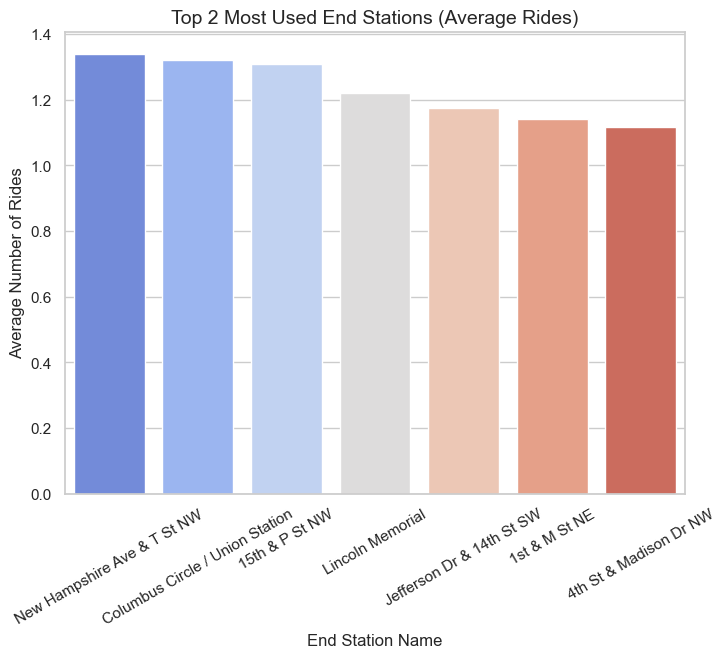

In [317]:
# 1️⃣ Group by end station and count the number of rides
station_counts = dc_capital_bike.groupby('end_station_name').size().reset_index(name='total_rides')

# 2️⃣ Calculate the average number of rides per station
station_counts['average_rides'] = station_counts['total_rides'] / dc_capital_bike['end_station_name'].nunique()

# 3️⃣ Get the top 2 most used end stations by average rides
top_2_stations = station_counts.nlargest(7, 'average_rides')

# 4️⃣ Plot using Seaborn barplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create barplot for the top 2 stations
sns.barplot(data=top_2_stations, x='end_station_name', y='average_rides', palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add labels and title
plt.xlabel('End Station Name', fontsize=12)
plt.ylabel('Average Number of Rides', fontsize=12)
plt.title('Top 2 Most Used End Stations (Average Rides)', fontsize=14)

# Show the plot
plt.show()


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2424156251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric_holidays['Date_year'] = df_electric_holidays['started_at'].dt.year


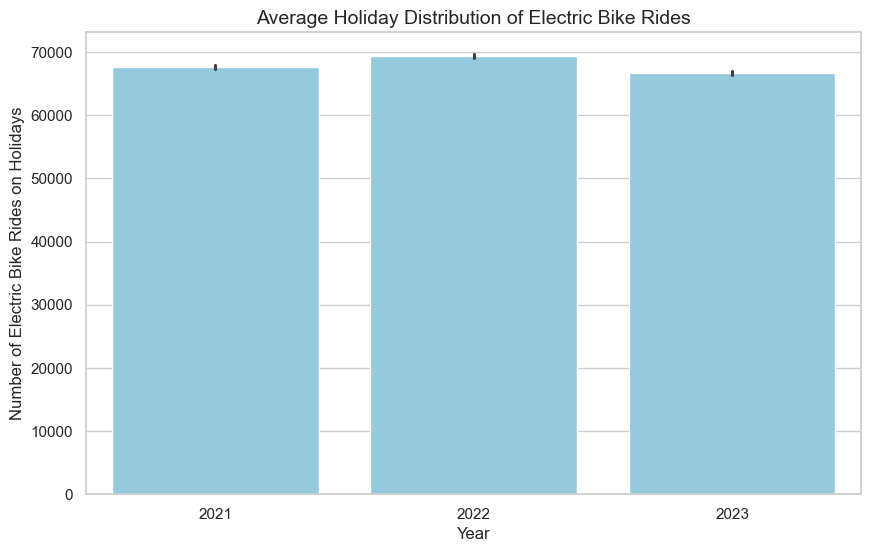

In [337]:
# 4️⃣ Filter only electric bike rides on holidays
df_electric_holidays = dc_capital_bike[dc_capital_bike['rideable_type'] == 'electric_bike']

# 5️⃣ Extract the year from start_time for grouping
df_electric_holidays['Date_year'] = df_electric_holidays['started_at'].dt.year

# 6️⃣ Group by year to calculate average rides
electric_holiday_avg = df_electric_holidays.groupby('Date_year').size().reset_index(name='total_rides')

# 7️⃣ Plot the average holiday distribution for electric bikes using Seaborn's barplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=dc_capital_bike, x='Date_year', y='ride_count', color='skyblue')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Electric Bike Rides on Holidays', fontsize=12)
plt.title('Average Holiday Distribution of Electric Bike Rides', fontsize=14)

# Show the plot
plt.show()


/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_11806/2921593940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric_holidays['Date_year'] = df_electric_holidays['started_at'].dt.year


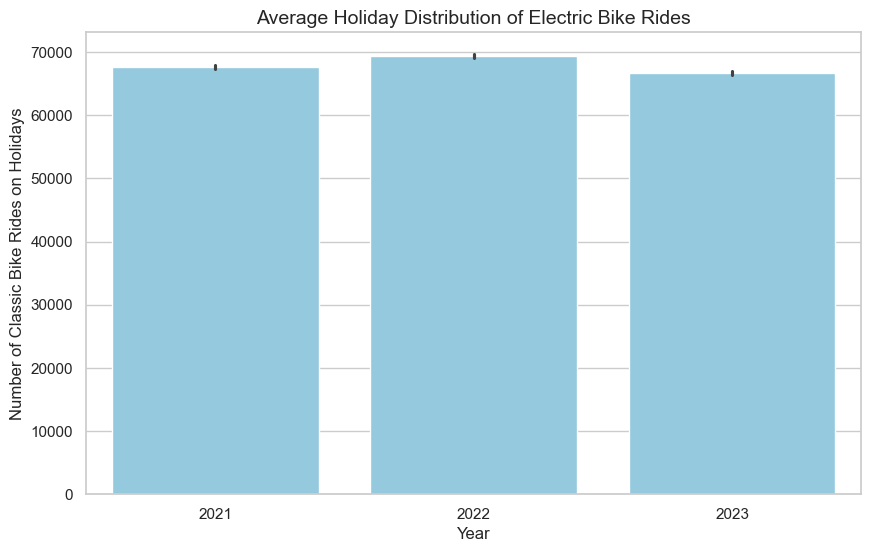

In [340]:
# 4️⃣ Filter only electric bike rides on holidays
df_electric_holidays = dc_capital_bike[dc_capital_bike['rideable_type'] == 'classic_bike']

# 5️⃣ Extract the year from start_time for grouping
df_electric_holidays['Date_year'] = df_electric_holidays['started_at'].dt.year

# 6️⃣ Group by year to calculate average rides
electric_holiday_avg = df_electric_holidays.groupby('Date_year').size().reset_index(name='total_rides')

# 7️⃣ Plot the average holiday distribution for electric bikes using Seaborn's barplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=dc_capital_bike, x='Date_year', y='ride_count', color='skyblue')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Classic Bike Rides on Holidays', fontsize=12)
plt.title('Average Holiday Distribution of Electric Bike Rides', fontsize=14)

# Show the plot
plt.show()

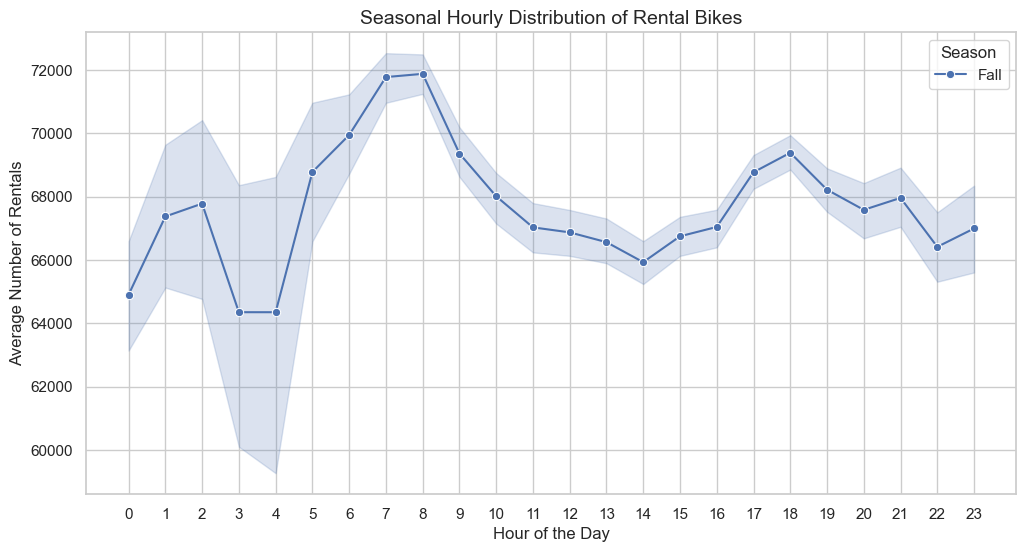

In [344]:
# Group by Season and Hour, calculate average rentals
hourly_distribution = dc_capital_bike.groupby(['Season', 'hour'])['ride_count'].mean().reset_index()

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Plotting the seasonal hourly distribution using lineplot
plt.figure(figsize=(12, 6))

sns.lineplot(data=dc_capital_bike, x='hour', y='ride_count', hue='Season', marker='o')

# Add labels and title
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Number of Rentals', fontsize=12)
plt.title('Seasonal Hourly Distribution of Rental Bikes', fontsize=14)

# Show legend and plot
plt.legend(title='Season')
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.show()

In [350]:
dc_capital_bike.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'time_of_day', 'duration_hours', 'distance_km',
       'speed_kmh', 'Season', 'Date_year', 'Date_day', 'Date_dow_name',
       'Date_month_name', 'Date_month_no', 'day', 'dow', 'weekend',
       'ride_count', 'hour', 'Minute', 'time', 'Holiday'],
      dtype='object')

In [353]:
dc_capital_bike['Date_month_name'].head(100)

0     January
1     January
2     January
3     January
4     January
       ...   
95    January
96    January
97    January
98    January
99    January
Name: Date_month_name, Length: 100, dtype: object